In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/liaopeng3/logs/google_analytics_all/train.csv')

/Users/liaopeng3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from pandas.io.json import json_normalize

In [4]:
import json

In [5]:
col_select = ['device','geoNetwork','totals','trafficSource']

In [6]:
df3 = pd.read_csv('/Users/liaopeng3/logs/google_analytics_all/train.csv',\
                  converters={cols:json.loads for cols in col_select},dtype={'fullVisitorId': 'str'},header=0)

In [7]:
for cols in col_select:
    column_as_df = json_normalize(df3[cols])
    column_as_df.columns = [f"{cols}.{subcolumn}" for subcolumn in column_as_df.columns]
    df3 = df3.drop(cols,axis=1)
    df3 = df3.merge(column_as_df,left_index=True,right_index=True)

In [8]:
# df3=pd.read_csv('/Users/liaopeng3/logs/google_analytics_all/train_df_3.csv',dtype={'fullVisitorId': 'str'})

In [9]:
df3.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [10]:
df3.shape

(903653, 55)

In [31]:
cols_drop = []
for cols in df3.columns:
    if df3[cols].nunique()==1:
        print(cols)
        cols_drop.append(cols)

date_dayofweek
date_year
date_month
date_day
date_hour


In [32]:
df3 = df3.drop(cols_drop,axis=1)

# Format the Numerous Variables

In [13]:
list_v = ['totals.hits','totals.pageviews','trafficSource.adwordsClickInfo.page']

In [14]:
for cols in list_v:
    df3[cols]=df3[cols].astype(float)

In [15]:
df3.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dtype='object')

In [16]:
df3.dtypes

channelGrouping                                  object
date                                              int64
fullVisitorId                                    object
sessionId                                        object
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device.browser                                   object
device.deviceCategory                            object
device.isMobile                                    bool
device.operatingSystem                           object
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.metro                                 object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                         

# Fill Null Cells with Most Frequent Value

In [17]:
for cols in df3.columns:
    if df3[cols].isna().sum()>0:
        val_tmp = df3[cols].mode()[0]
        df3[cols]=df3[cols].fillna(value=val_tmp)
    

# Convert the Object Values to Numeric

In [18]:
for cols in df3.columns:
    if df3[cols].dtypes == 'O':
#         df3[cols] = df3[cols].astype('category')
#         df3["new_"+cols] = df3[cols].cat.codes
        df3["new_"+cols] = pd.factorize( df3[cols])[0]
        df3 = df3.drop(cols,axis=1)
        df3 = df3.rename(columns={"new_"+cols:cols})

In [19]:
df3.head()

,date,visitId,visitNumber,visitStartTime,device.isMobile,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,channelGrouping,fullVisitorId,...,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,20160902,1472830385,1,1472830385,False,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20160902,1472880147,1,1472880147,False,1.0,1.0,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20160902,1472865386,1,1472865386,False,1.0,1.0,1.0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,20160902,1472881213,1,1472881213,False,1.0,1.0,1.0,0,3,...,0,0,0,0,0,0,1,0,0,0
4,20160902,1472822600,2,1472822600,True,1.0,1.0,1.0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df3.dtypes

date                                              int64
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device.isMobile                                    bool
totals.hits                                     float64
totals.pageviews                                float64
trafficSource.adwordsClickInfo.page             float64
channelGrouping                                   int64
fullVisitorId                                     int64
sessionId                                         int64
device.browser                                    int64
device.deviceCategory                             int64
device.operatingSystem                            int64
geoNetwork.city                                   int64
geoNetwork.continent                              int64
geoNetwork.country                                int64
geoNetwork.metro                                

# Convert Date to Numeric Variables

In [21]:
df3.head()

,date,visitId,visitNumber,visitStartTime,device.isMobile,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,channelGrouping,fullVisitorId,...,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,20160902,1472830385,1,1472830385,False,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20160902,1472880147,1,1472880147,False,1.0,1.0,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20160902,1472865386,1,1472865386,False,1.0,1.0,1.0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,20160902,1472881213,1,1472881213,False,1.0,1.0,1.0,0,3,...,0,0,0,0,0,0,1,0,0,0
4,20160902,1472822600,2,1472822600,True,1.0,1.0,1.0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df3['date'] = pd.to_datetime(df3['date'])

In [23]:
df3['date_dayofweek'] = df3['date'].dt.dayofweek
df3['date_year'] = df3['date'].dt.year

In [29]:
df3['date_hour'] = df3['date'].dt.hour

In [24]:
df3['date_month'] = df3['date'].dt.month
df3['date_day'] = df3['date'].dt.day

In [33]:
df3 = df3.drop('date',axis=1)

# Visit Time

In [25]:
df3['visitStartTime'] = pd.to_datetime(df3['visitStartTime'],unit='s')

In [30]:
df3.head()

,date,visitId,visitNumber,visitStartTime,device.isMobile,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,channelGrouping,fullVisitorId,...,date_dayofweek,date_year,date_month,date_day,visit_dayofweek,visit_year,visit_month,visit_day,visit_hour,date_hour
0,1970-01-01 00:00:00.020160902,1472830385,1,2016-09-02 15:33:05,False,1.0,1.0,1.0,0,0,...,3,1970,1,1,4,2016,9,2,15,0
1,1970-01-01 00:00:00.020160902,1472880147,1,2016-09-03 05:22:27,False,1.0,1.0,1.0,0,1,...,3,1970,1,1,5,2016,9,3,5,0
2,1970-01-01 00:00:00.020160902,1472865386,1,2016-09-03 01:16:26,False,1.0,1.0,1.0,0,2,...,3,1970,1,1,5,2016,9,3,1,0
3,1970-01-01 00:00:00.020160902,1472881213,1,2016-09-03 05:40:13,False,1.0,1.0,1.0,0,3,...,3,1970,1,1,5,2016,9,3,5,0
4,1970-01-01 00:00:00.020160902,1472822600,2,2016-09-02 13:23:20,True,1.0,1.0,1.0,0,4,...,3,1970,1,1,4,2016,9,2,13,0


In [27]:
df3['visit_dayofweek'] = df3['visitStartTime'].dt.dayofweek
df3['visit_year'] = df3['visitStartTime'].dt.year

In [28]:
df3['visit_month'] = df3['visitStartTime'].dt.month
df3['visit_day'] = df3['visitStartTime'].dt.day
df3['visit_hour'] = df3['visitStartTime'].dt.hour

In [123]:
df3['visitStartTime'] = df3.visitStartTime.map( lambda x: pd.to_datetime(x).hour )

In [34]:
df3 = df3.drop('visitStartTime',axis=1)

# Convert the BOOL Values

In [35]:
df3['device.isMobile'].dtypes

dtype('bool')

In [36]:
for cols in df3.columns:
    if df3[cols].dtypes=='bool':
        df3['new_'+cols]=df3[cols].apply(lambda x: 1 if x else 0)
        df3=df3.drop(cols,axis=1)
        df3 = df3.rename(columns={'new_'+cols:cols})

# Baseline Model

In [37]:
train_x = df3.drop('totals.transactionRevenue',axis=1)
train_y = df3['totals.transactionRevenue']

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
model=regr.fit(train_x, train_y)


/Users/liaopeng3/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
import numpy as np

In [42]:
calc_train_error(train_x, train_y, model)

237.2975174506705

In [43]:
param = {'num_leaves': 300,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "rf",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 1,
         "verbosity": -1}

In [44]:
import lightgbm as lgb

In [45]:
from sklearn.model_selection import KFold
import time

In [46]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(df3))
predictions = np.zeros(len(df3))
start = time.time()
features = list(train_x.columns)
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_x.values, train_y.values)):
    trn_data = lgb.Dataset(train_x.iloc[trn_idx].values, label=train_y.iloc[trn_idx].values)
    val_data = lgb.Dataset(train_x.iloc[val_idx].values, label=train_y.iloc[val_idx].values)
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(train_x.iloc[val_idx].values, num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(train_x.values, num_iteration=clf.best_iteration) / folds.n_splits

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 206.697	valid_1's rmse: 222.455
[200]	training's rmse: 206.54	valid_1's rmse: 222.404
[300]	training's rmse: 206.535	valid_1's rmse: 222.37
Early stopping, best iteration is:
[224]	training's rmse: 206.533	valid_1's rmse: 222.318
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 206.825	valid_1's rmse: 222.529
Early stopping, best iteration is:
[45]	training's rmse: 206.891	valid_1's rmse: 222.319
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 208.005	valid_1's rmse: 216.84
Early stopping, best iteration is:
[49]	training's rmse: 207.873	valid_1's rmse: 217.037
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 206.658	valid_1's rmse: 222.727
[200]	training's rmse: 206.512	valid_1's rmse: 222.606
Early stopping, best iteration is:
[139]	training's rmse: 206.584	valid_1's rmse: 222.591
Training

In [48]:
import matplotlib.pyplot as plt

In [50]:
import seaborn as sns

/Users/liaopeng3/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


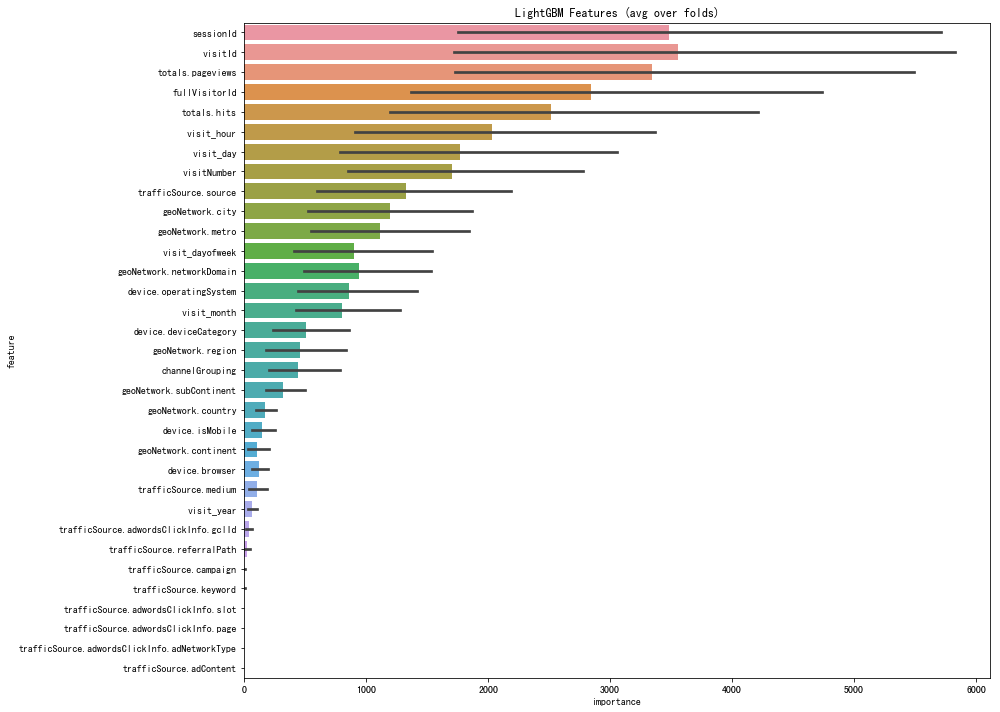

In [51]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:1000].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')